## Library Importing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from nltk.tokenize import word_tokenize 
!pip install krovetzstemmer
import krovetzstemmer
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
from krovetzstemmer import Stemmer
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

!pip install -q keras
import keras
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'
print(accelerator)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import backend as K
from keras.models import Sequential
from keras import layers


     |████████████████████████████████| 112kB 2.8MB/s 
  Created wheel for krovetzstemmer: filename=KrovetzStemmer-0.6-cp36-cp36m-linux_x86_64.whl size=351581 sha256=05e4ddb902a7b17ff8614c22d39e5e68f882867b9bde113d31f13db74d088c9a
  Stored in directory: /root/.cache/pip/wheels/fd/3b/64/498593e2be842a1c29c5ae68017c1b0ff548889305897b65d4
Successfully built krovetzstemmer
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |  

Using TensorFlow backend.


cu80


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Data Importing,Pre-processing, Train-Test Split

In [ ]:



train=pd.read_csv("/content/drive/My Drive/QUORA/train.csv" )
test=pd.read_csv("/content/drive/My Drive/QUORA/test.csv")

train=train.dropna()
test=test.dropna()

#Notation 1:
"""
Since we do not have labels for test data which provided by Kaggle, we will use 125% percent of 
training data for the testing. 350.000 record for train and 50.000 record for testing."""
#Notation 2:
"""
For time efficiency, we will find the optimal hyperparameters of models with using sub-train data,
later we use these obtained hyperparameters on the Actual data. 
This sub-data is called x_train_trial which consist of 20000 records."""


'\nFor time efficiency, we will find the optimal hyperparameters of models with using sub-train data,\nlater we use these obtained hyperparameters on the Actual data. \nThis sub-data is called x_train_trial which consist of 20000 records.'

In [ ]:
train.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [ ]:
import sklearn 
from sklearn.model_selection import train_test_split

X=train[[ "qid1","qid2",'question1','question2']] 
y=train['is_duplicate']

#Handling format related issues , not important.
X['question1'] = X['question1'].astype(str)
X['question2'] = X['question2'].astype(str)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
print(X.shape)
print(y.shape)




(404287, 4)
(404287,)


### Pre-Processing
Lowercase operation, Remove punctiation , Stopword removal,  Tokenization

In [ ]:
#1- Make all lowercase.

X.question1 = X.question1.str.lower()
X.question2 = X.question2.str.lower()

#X_test.question1 = X_test.question1.str.lower()
#X_test.question2 = X_test.question2.str.lower()



#Tokenization and Removing non-alphanumerical  characters and stopword-removal for question 1-2 in train-test

stop_words = set(stopwords.words('english')) 

filtered_words=[]
for word in X["question1"]:

    word_tokens=word_tokenize(word)

    filtered_sentence = [w for w in word_tokens if ((not w in stop_words) and w.isalpha()==True)] 
    #filtered_sentence = [w for w in word_tokens if (w.isalpha()==True)] #stopword bu şekilde kaldırıldı.
    filtered_words.append(filtered_sentence)

X["question1_tokenized"]=filtered_words

filtered_words=[]
for word in X["question2"]:
    word_tokens = word_tokenize(word) 

    filtered_sentence = [w for w in word_tokens if ((not w in stop_words) and w.isalpha()==True)]
    #filtered_sentence = [w for w in word_tokens if ( w.isalpha()==True)] 
    filtered_words.append(filtered_sentence)

X["question2_tokenized"]=filtered_words
#Xtest

###########################################################################################

print("Stemming begins !")

stemmer = Stemmer()
stemmer.stem('utilities')  # got: 'utility'

#For stemming tranining data
dum=X["question1_tokenized"]
stemmed_tweets=[]
for tweet in dum:
    tweet_arr=[]
    for word in tweet :
        #print(stemmer.stem(word))
        tweet_arr.append(stemmer.stem(word))
    stemmed_tweets.append(tweet_arr)
    
X["question1-stemmed"]=stemmed_tweets

#for q2
dum=X["question2_tokenized"]
stemmed_tweets=[]
for tweet in dum:
    tweet_arr=[]
    for word in tweet :
        #print(stemmer.stem(word))
        tweet_arr.append(stemmer.stem(word))
    stemmed_tweets.append(tweet_arr)
    
X["question2-stemmed"]=stemmed_tweets





/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Stemming begins !


In [ ]:
#some reverse-reprocessingg for distance calculation
m=[]
for w in X["question1-stemmed"]:
    a=" ".join(w)
    m.append(a)
X["question1"]=m


m=[]
for w in X["question2-stemmed"]:
    a=" ".join(w)
    m.append(a)
X["question2"]=m





In [ ]:
print(X.shape)
print(y.shape)

(404287, 8)
(404287,)


In [ ]:
X.head(1)

,qid1,qid2,question1,question2,question1_tokenized,question2_tokenized,question1-stemmed,question2-stemmed
0,1,2,step step guide invest share market india,step step guide invest share market,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]","[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]"


### Train - Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.125, random_state=42,shuffle=True) #This is all data


## Seperate Feature Extraction for train and test :

In [ ]:
import gensim

# Load Google's pre-trained Word2Vec model.
w2v_model = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/My Drive/GoogleNews-vectors-negative300.bin.gz", binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### Computing Word Mover's Distance (WMD)


The WMD measures the dissimilarity between two text documents as the minimum amount of distance that the embedded words of one document need to "travel" to reach the embedded words of another document. WMD, uses the Euclidean distance. The Euclidean distance between two vectors might be large because their lengths differ, but the cosine distance is small because the angle between them is small; we can mitigate some of this by normalizing the vectors.

In [ ]:
#Just a example
distance = w2v_model.wmdistance(X.iloc[0,2], X.iloc[0,3])
print(X.iloc[0,2]," - ", X.iloc[0,3]) # corresponds first q1 and q2 in 10'th row.
print ('distance = %.4f' % distance)



step step guide invest share market india  -  step step guide invest share market
distance = 0.3145


In [ ]:
# Calculate distance and add it as a new feature for train
wmd_dists=[]
for i in range (0,len(X_train)):
    distance = w2v_model.wmdistance(X_train.iloc[i,2], X_train.iloc[i,3])
    if distance >10000:
      wmd_dists.append(0)
    else:
      wmd_dists.append(distance)

X_train['WMD']=wmd_dists


#For test

wmd_dists=[]
for i in range (0,len(X_test)):
    distance = w2v_model.wmdistance(X_test.iloc[i,2], X_test.iloc[i,3])
    if distance >10000:
      wmd_dists.append(0)
    else:
      wmd_dists.append(distance)

X_test['WMD']=wmd_dists




In [ ]:
print(X_train.columns)
print(X_test.columns)

Index(['qid1', 'qid2', 'question1', 'question2', 'question1_tokenized',
       'question2_tokenized', 'question1-stemmed', 'question2-stemmed',
       'wordShare', 'common_words', 'shared-tfidf', 'WMD'],
      dtype='object')
Index(['qid1', 'qid2', 'question1', 'question2', 'question1_tokenized',
       'question2_tokenized', 'question1-stemmed', 'question2-stemmed',
       'wordShare', 'common_words', 'shared-tfidf', 'WMD'],
      dtype='object')


### Adding Question Frequencies

In [ ]:
#Adding frequencies of questions  for X_train
q1_frequency = X_train.groupby('qid1')['qid1'].transform('count')
q2_frequency = X_train.groupby('qid2')['qid2'].transform('count')
X_train['Q1-FREQ'] =q1_frequency
X_train['Q2-FREQ'] =q2_frequency



In [ ]:
#Adding frequencies of questions  for X_test
q1_frequency = X_test.groupby('qid1')['qid1'].transform('count')
q2_frequency = X_test.groupby('qid2')['qid2'].transform('count')
X_test['Q1-FREQ'] =q1_frequency
X_test['Q2-FREQ'] =q2_frequency


In [ ]:
print(X_train.columns)
print(X_test.columns)

Index(['qid1', 'qid2', 'question1', 'question2', 'question1_tokenized',
       'question2_tokenized', 'question1-stemmed', 'question2-stemmed', 'WMD',
       'Q1-FREQ', 'Q2-FREQ'],
      dtype='object')
Index(['qid1', 'qid2', 'question1', 'question2', 'question1_tokenized',
       'question2_tokenized', 'question1-stemmed', 'question2-stemmed', 'WMD',
       'Q1-FREQ', 'Q2-FREQ'],
      dtype='object')


### Calculate  #of Common Words between question pairs

In [ ]:
def common(row):
  return int(len(set(row['question1'].lower().strip().split()) & set(row['question2'].lower().strip().split())))


X_train['wordShare'] = X_train.apply(lambda row: common(row), axis = 1);
X_test['wordShare'] = X_test.apply(lambda row: common(row), axis = 1);




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
DUMMY=X_train
DUMMY['common_words']=""

def common_words(row):
  q1words=row['question1'].split()
  q2words=row['question2'].split()

  common=set(q1words).intersection(set(q2words))
  j=" ".join(common)
  row['common_words']=j

  return row

arr=DUMMY.apply(common_words,axis=1)


##########For test

DUMMY2=X_test
DUMMY2['common_words']=""
arr2=DUMMY2.apply(common_words,axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Calculation of TF-IDF

In [ ]:
#Example

#As below example, we create the tf-idf matrix with the train data and then apply this transormation to the   X_test.
#This means there is no any information leak!
#If there is unknown word in Test, than tf-idf score is 0.

#BELOW IS THE EXAMPLE NOT REAL DATA !
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train = ["We love apples", "We really love bananas"]
vect.fit(x_train)
print(vect.get_feature_names())

x_test =  ["We really love pears"]

vectorized = vect.transform(x_test)
print(vectorized.mean())
####################################

['apples', 'bananas', 'love', 'really', 'we']
0.34160146062393804


In [ ]:
X_train=arr
X_test=arr2

In [ ]:
#Now let's calculate the tf-idf
from collections import Counter

#Create Bag of Word
questions1 = X_train['question1'];
questions2 = X_train['question2'];
bow = list(questions1) + list(questions2);
#bow= Counter([ str(word) for quest in questions for word in quest])
print(type(bow))

<class 'list'>


In [ ]:
#vectorized.toarray()[0].mean()

In [ ]:
list(bow)[0:3]

['study excellent financial analyst',
 'example subsistence farming',
 'parent wo let choose future job college follow heart want']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVec = TfidfVectorizer(lowercase = False, min_df = 3, max_features = 10000) # tfidfVec is the variable I created. It is a declaration of class variable TfidfVectorizer.
#Notation !
"""
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. 
This value is also called cut-off in the literature. If float,
the parameter represents a proportion of documents, integer absolute counts. 
"""
tfidfVec.fit(pd.Series(pd.Series(bow).tolist())) #fit(self, raw_documents[, y])	Learn vocabulary and idf from training set
#fit_transform(self, raw_documents[, y])	Learn vocabulary and idf, return term-document matrix
#We created the bow from only X_train !


###############Trial



TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=False, max_df=1.0,
                max_features=10000, min_df=3, ngram_range=(1, 1), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [ ]:
a=[]
for words in X_train['common_words']:
  vals=tfidfVec.transform([words])
  a.append(vals.mean())

#Now we transform both questions in train and test from the bow.

a[:2]
#q2_tfidf_train=tfidfVec.transform(X_train['common_words'].fillna("").toarray())
#q1_tfidf_test=tfidfVec.transform(X_test['common_words'].fillna("").toarray())
#q2_tfidf_test=tfidfVec.transform(X_test['common_words'].fillna("").toarray())

[0.0001412660602572571, 0.00013737617994825457]

In [ ]:
b=[]
for words in X_test['common_words']:
  vals=tfidfVec.transform([words])
  b.append(vals.mean())

,qid1,qid2,question1,question2,question1_tokenized,question2_tokenized,question1-stemmed,question2-stemmed,wordShare,common_words,shared-tfidf
290384,411670,411671,study excellent financial analyst,financial analyst use sql,"[study, excellent, financial, analyst]","[financial, analysts, use, sql]","[study, excellent, financial, analyst]","[financial, analyst, use, sql]",2,analyst financial,0.000141
184897,282382,282383,example subsistence farming,example simple farming tool,"[examples, subsistence, farming]","[examples, simple, farming, tools]","[example, subsistence, farming]","[example, simple, farming, tool]",2,example farming,0.000137
107350,176640,176641,parent wo let choose future job college follow...,pass go appear jee pls suggest best cs college...,"[parents, wo, let, choose, future, job, colleg...","[passed, going, appear, jee, pls, suggest, bes...","[parent, wo, let, choose, future, job, college...","[pass, go, appear, jee, pls, suggest, best, cs...",1,college,0.000100
279787,399275,250080,internal parts computer purpose,internal parts computer system purpose serve,"[internal, parts, computer, purpose]","[internal, parts, computer, system, purpose, s...","[internal, parts, computer, purpose]","[internal, parts, computer, system, purpose, s...",4,purpose internal parts computer,0.000198
58238,102205,102206,delete amazon account,delete amazon account,"[delete, amazon, account]","[delete, amazon, account]","[delete, amazon, account]","[delete, amazon, account]",3,delete account amazon,0.000172
...,...,...,...,...,...,...,...,...,...,...,...
259180,374920,374921,power positive thinking,cultivate power positive thinking,"[power, positive, thinking]","[cultivate, power, positive, thinking]","[power, positive, thinking]","[cultivate, power, positive, thinking]",3,positive power thinking,0.000173
365841,495977,17978,things new employee know go first day tennant,things new employee know go first day,"[things, new, employees, know, going, first, d...","[things, new, employees, know, going, first, day]","[things, new, employee, know, go, first, day, ...","[things, new, employee, know, go, first, day]",7,day know new employee first go things,0.000264
131933,9848,127922,current winning presidential election,bias aside point time think win presidential e...,"[currently, winning, presidential, election]","[biases, aside, point, time, think, win, presi...","[current, winning, presidential, election]","[bias, aside, point, time, think, win, preside...",2,presidential election,0.000141
146868,231910,231911,movies leading actor become mafia,fix internet connection available problem mobi...,"[movies, leading, actor, becomes, mafia]","[fix, internet, connection, available, problem...","[movies, leading, actor, become, mafia]","[fix, internet, connection, available, problem...",0,,0.000000


In [ ]:
#Not need this anymore

"""
from scipy.sparse import coo_matrix, hstack

#form the last version of Train and Test data.
#Train
X_TRAIN_TFIDF = hstack(( q1_tfidf_train,q2_tfidf_train, X_train[ ['Q1-FREQ','Q2-FREQ','wordShare','WMD']]))
print(X_TRAIN_TFIDF.shape)
#Test

#TFIDF_log_X=hstack(q1_tfidf,\q2_tfidf)
X_TEST_TFIDF = hstack(( q1_tfidf_test,q2_tfidf_test, X_test[ ['Q1-FREQ','Q2-FREQ','wordShare','WMD']]))
print(X_TEST_TFIDF.shape)

"""



(353751, 20004)
(50536, 20004)


In [ ]:
#Notice ! Where was that shape come from  ?
"""
(353751, 53492)

353751 corresponds the training data size -> instance 
53492 =  26744*2 (TFIDF matrix Both for question 1 and 2 -> horizontal concatenation ) + 4
4 comes from extracted features, represents  Q1-FREQ,Q2-FREQ,wordShare,WMD respectively.
Same idea also in test.
"""

'\n(353751, 53492)\n\n353751 corresponds the training data size -> instance \n53492 =  26744*2 (TFIDF matrix Both for question 1 and 2 -> horizontal concatenation ) + 4\n4 comes from extracted features, represents  Q1-FREQ,Q2-FREQ,wordShare,WMD respectively.\nSame idea also in test.\n'

In [ ]:
#Save it for using later.
X_test.to_csv('X_TEST-QUORA.csv')
!cp X_TRAIN-QUORA.csv drive/My\ Drive/

In [ ]:
y_train.to_csv('Y_TRAIN-QUORA.csv')
!cp X_TRAIN-QUORA.csv drive/My\ Drive/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
y_test.to_csv('Y_TEST-QUORA.csv')
!cp X_TRAIN-QUORA.csv drive/My\ Drive/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
y_train.shape

(353751,)

# **Machine Learning Models**

In [ ]:
#Let's divide part of training data only for seeking optimal hyperparamters of models ! For time efficency.
idx=np.arange(0,20000)
X_SUB_TRAIN=X_TRAIN_TFIDF.tocsr()[idx] # Sparses matrices cannot subscriptable
y_sub_train=y_train[0:20000]


print(X_TRAIN_TFIDF.shape)
print(X_TEST_TFIDF.shape)
print(y_train.shape)
print(y_test.shape)
print(X_SUB_TRAIN.shape)
print(y_sub_train.shape)


(353751, 20004)
(50536, 20004)
(353751,)
(50536,)
(20000, 20004)
(20000,)


##  Logistic Regression

### Hyper-parameter tuning with Random Search and cross validation

In [ ]:
C = np.logspace(0, 4, 10)
C

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

model_logistic = LogisticRegression()

# Create regularization penalty space
pen = ['l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 3)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=pen)


# Create grid search using 5-fold cross validation
clf = RandomizedSearchCV(model_logistic, hyperparameters, cv=5, verbose=1)

# Fit grid search
best_model = clf.fit(X_SUB_TRAIN, y_sub_train)


# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])





/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   37.4s finished


Best Penalty: l2
Best C: 1.0


In [ ]:
#USE BEST MODEL TO TRAIN ALL DATA.
# Create regularization penalty space
PEN = 'l2'

# Create regularization hyperparameter space
c = 1.0
model_logistic = LogisticRegression( C=1 , penalty='l2',max_iter=300)

model_logistic.fit(X_TRAIN_TFIDF, y_train)

# Predict target vector
prediction=model_logistic.predict(X_TEST_TFIDF)

a=classification_report(y_test, prediction)
b=confusion_matrix(y_test, prediction)

print(a)
print(b)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.76      0.90      0.82     31784
           1       0.75      0.52      0.61     18752

    accuracy                           0.76     50536
   macro avg       0.75      0.71      0.72     50536
weighted avg       0.76      0.76      0.75     50536

[[28539  3245]
 [ 9027  9725]]



When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. 
This value is also called cut-off in the literature. If float,
the parameter represents a proportion of documents, integer absolute counts. 



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


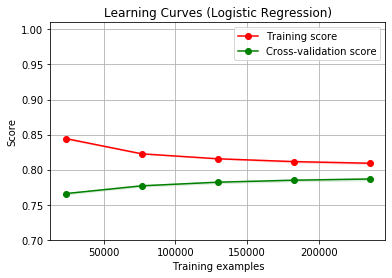

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(model_logistic, title, X_TRAIN_TFIDF, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)


plt.show()

### Tuned Logistic Model

## Random Forest

### Hyper-parameter tuning with Grid Search, cross valid

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42, verbose =1)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())



Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 1,
 'warm_start': False}


In [ ]:

import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = n_estimators = [10,20,30,40,50,60,80,100]

# Number of features to consider at every split
# Maximum number of levels in tree
max_depth = [4,6,8,10]


random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}
rf=RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_SUB_TRAIN, y_sub_train)

rf_random.best_params_

#best params -> depth None est-> 400


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   24.3s finished


{'max_depth': 10, 'n_estimators': 30}

### Tuned Random Forest Model

              precision    recall  f1-score   support

           0       0.76      0.95      0.85     31784
           1       0.85      0.50      0.63     18752

    accuracy                           0.78     50536
   macro avg       0.81      0.72      0.74     50536
weighted avg       0.80      0.78      0.77     50536
 [[30140  1644]
 [ 9375  9377]]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


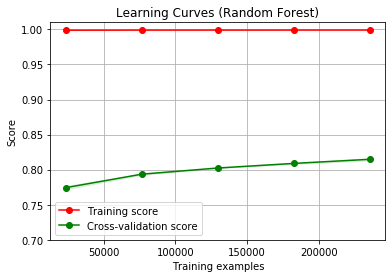

In [ ]:
#look at the improvement
rf_model = RandomForestClassifier(n_estimators = 30, random_state = 42,max_depth= None)
rf_model.fit(X_TRAIN_TFIDF, y_train)

prediction=rf_model.predict(X_TEST_TFIDF)
a=classification_report(y_test, prediction)
b=confusion_matrix(y_test, prediction)
print(a,b)


title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(rf_model, title, X_TRAIN_TFIDF, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)


plt.show()


              precision    recall  f1-score   support

           0       0.71      0.98      0.82     31784
           1       0.89      0.31      0.46     18752

    accuracy                           0.73     50536
   macro avg       0.80      0.64      0.64     50536
weighted avg       0.77      0.73      0.69     50536
 [[31061   723]
 [12906  5846]]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


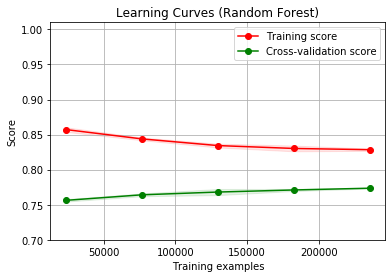

In [ ]:
#look at the improvement
rf_model = RandomForestClassifier(n_estimators = 30, random_state = 42,max_depth= 50)
rf_model.fit(X_TRAIN_TFIDF, y_train)

prediction=rf_model.predict(X_TEST_TFIDF)
a=classification_report(y_test, prediction)
b=confusion_matrix(y_test, prediction)
print(a,b)


title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(rf_model, title, X_TRAIN_TFIDF, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)


plt.show()


# Support Vector Machine

```
# This is formatted as code
```



### Grid Search with cross validation on svm 

In [ ]:
from sklearn.model_selection import GridSearchCV 

from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = RandomizedSearchCV(SVC(), param_grid, refit = True,cv = 3, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_SUB_TRAIN, y_sub_train) 

# print best parameter after tuning 
pprint(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
pprint(grid.best_estimator_) 

NameError: ignored

In [ ]:
# print best parameter after tuning 
pprint(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
pprint(grid.best_estimator_) 

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
# defining parameter range 
from sklearn.model_selection import GridSearchCV 

from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
svm=SVC(C=10,gamma=0.01,kernel='rbf')

svm.fit(X_TRAIN_TFIDF, y_train) 


prediction=svm.predict(X_TEST_TFIDF)
a=classification_report(y_test, prediction)
b=confusion_matrix(y_test, prediction)
print(a,b)

In [ ]:



title = "Learning Curves (Support Vector Machine)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(svm, title, X_TRAIN_TFIDF, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)


plt.show()


### Tuned SVM Model


# XGBOOST

## Hyperparamerter tuning with grid search and cross validation

In [ ]:
import xgboost as xgb

In [ ]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



params = {"objective":"reg:linear",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5,
          'alpha': 10}





## Grid Search with cross validation


In [ ]:

# Number of trees in random forest
n_estimators = [100]

# Number of features to consider at every split
# Maximum number of levels in tree
max_depth = [8,10]
from sklearn.model_selection import RandomizedSearchCV


# Create the random grid
grid_param = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': [0.001,0.01]
               }


# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgb_model = xgb.XGBClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xg_random = RandomizedSearchCV(xgb_model, grid_param, refit = True,cv = 3, verbose=3, n_jobs = -1)
# Fit the random search model
xg_random.fit(X_SUB_TRAIN, y_sub_train)

xg_random.best_params_


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  1.4min remaining:   16.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.4min finished


{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100}

In [ ]:

xgb_tuned_model=xgb.XGBClassifier(learning_rate= 0.01, max_depth = 30, n_estimators= 100)

xgb_tuned_model.fit(X_TRAIN_TFIDF, y_train) 

prediction=xgb_tuned_model.predict(X_TEST_TFIDF)
a=classification_report(y_test, prediction)
b=confusion_matrix(y_test, prediction)
print(a,b)


              precision    recall  f1-score   support

           0       0.71      0.94      0.81     31784
           1       0.77      0.37      0.50     18752

    accuracy                           0.72     50536
   macro avg       0.74      0.65      0.65     50536
weighted avg       0.74      0.72      0.69     50536
 [[29724  2060]
 [11863  6889]]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

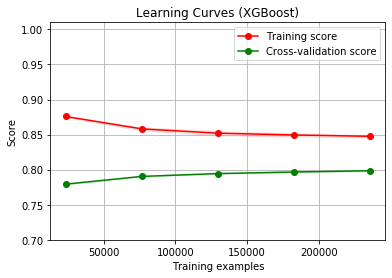

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
title = "Learning Curves (XGBoost)"


# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(xgb_tuned_model, title, X_TRAIN_TFIDF, y_train, ylim=(0.7, 1.01), cv=3, n_jobs=-1)

## Base XGBoost Model

# Deep Learning 

## CNN with Word2vec embedding

In [ ]:
print("Word Embedding Starts... for question1")
# train your word embeddings during the training of your neural network. 
from keras.preprocessing.text import Tokenizer
tokenizer_q1 = Tokenizer(num_words=100000)
tokenizer_q1.fit_on_texts(X_train["question1"])
X_train_dl_q1 = tokenizer_q1.texts_to_sequences(X_train["question1"])
X_test_dl_q1 = tokenizer_q1.texts_to_sequences(X_test["question1"])
vocab_size_q1 = len(tokenizer_q1.word_index) + 1 
wordIndex_q1=tokenizer_q1.word_index # it is my index
#implement padding

from keras.preprocessing.sequence import pad_sequences
max_len = 100
X_train_q1 = pad_sequences(X_train_dl_q1, padding='post', maxlen=max_len)
X_test_q1 = pad_sequences(X_test_dl_q1, padding='post', maxlen=max_len)


print(X_test['question1'].iloc[0]) # ?
print(X_test_q1[0])


Word Embedding Starts... for question1
play pokémon go korea
[140 979  21 578   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
print("Word Embedding Starts... for question2")
# train your word embeddings during the training of your neural network. 
from keras.preprocessing.text import Tokenizer
tokenizer_q2 = Tokenizer(num_words=100000)
tokenizer_q2.fit_on_texts(X_train["question2"])
X_train_dl_q2 = tokenizer_q2.texts_to_sequences(X_train["question2"])
X_test_dl_q2 = tokenizer_q2.texts_to_sequences(X_test["question2"])
vocab_size_q2 = len(tokenizer_q2.word_index) + 1 
wordIndex_q2=tokenizer_q2.word_index # it is my index
#implement padding

from keras.preprocessing.sequence import pad_sequences
max_len = 100
X_train_q2 = pad_sequences(X_train_dl_q2, padding='post', maxlen=max_len)
X_test_q2 = pad_sequences(X_test_dl_q2, padding='post', maxlen=max_len)




Word Embedding Starts... for question2


In [ ]:
  def createEmbeddingMatrix(wordIndex):
    embedding_dim=300
    vocabulary_size=min(len(wordIndex)+1,60000)
    embedding_matrix = np.zeros((vocabulary_size, embedding_dim))
    for word, i in wordIndex.items():
        if i>=50000:
          continue
        try:
            embedding_vector = w2v_model[word]
            embedding_matrix[i] = embedding_vector
        except KeyError:
          embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),embedding_dim)

    
    return embedding_matrix

  

In [ ]:
np.array(y_train).shape

(353751,)

In [ ]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D,Conv2D,MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
from sklearn.metrics import classification_report
from keras.layers import Input, TimeDistributed, Dense, Lambda, concatenate, Dropout, BatchNormalization ,GlobalMaxPooling1D
from keras import backend as K
from keras.models import Model
import csv, datetime, time, json
from keras.callbacks import Callback, ModelCheckpoint
from keras import optimizers

!pip install -q keras
import keras


def recall_m(true_Y, pred_Y):
        TP = K.sum(K.round(K.clip(true_Y * pred_Y, 0, 1)))
        possible_pos = K.sum(K.round(K.clip(true_Y, 0, 1)))
        rec = TP / (possible_pos + K.epsilon())
        return rec

def precision_m(true_Y, pred_Y):
        true_positives = K.sum(K.round(K.clip(true_Y * pred_Y, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(pred_Y, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(true_Y, pred_Y):
    pres = precision_m(true_Y, pred_Y)
    rec = recall_m(true_Y, pred_Y)
    return 2*((pres*rec)/(pres+rec+K.epsilon()))



(?, ?)
a
Starting training at 2019-12-26 01:12:01.597600
Train on 318375 samples, validate on 35376 samples
Epoch 1/40
 - 78s - loss: 0.5368 - acc: 0.7278 - f1_m: 0.5431 - precision_m: 0.6752 - recall_m: 0.4804 - val_loss: 0.5048 - val_acc: 0.7485 - val_f1_m: 0.6214 - val_precision_m: 0.6947 - val_recall_m: 0.5803
Epoch 2/40
 - 69s - loss: 0.4674 - acc: 0.7739 - f1_m: 0.6507 - precision_m: 0.7388 - recall_m: 0.6026 - val_loss: 0.4807 - val_acc: 0.7640 - val_f1_m: 0.6433 - val_precision_m: 0.7226 - val_recall_m: 0.5992
Epoch 3/40
 - 68s - loss: 0.4209 - acc: 0.8013 - f1_m: 0.7011 - precision_m: 0.7674 - recall_m: 0.6658 - val_loss: 0.4766 - val_acc: 0.7706 - val_f1_m: 0.6697 - val_precision_m: 0.7103 - val_recall_m: 0.6535
Epoch 4/40
 - 68s - loss: 0.3826 - acc: 0.8233 - f1_m: 0.7386 - precision_m: 0.7920 - recall_m: 0.7106 - val_loss: 0.4786 - val_acc: 0.7746 - val_f1_m: 0.6695 - val_precision_m: 0.7235 - val_recall_m: 0.6414
Epoch 5/40
 - 68s - loss: 0.3493 - acc: 0.8418 - f1_m: 0.768

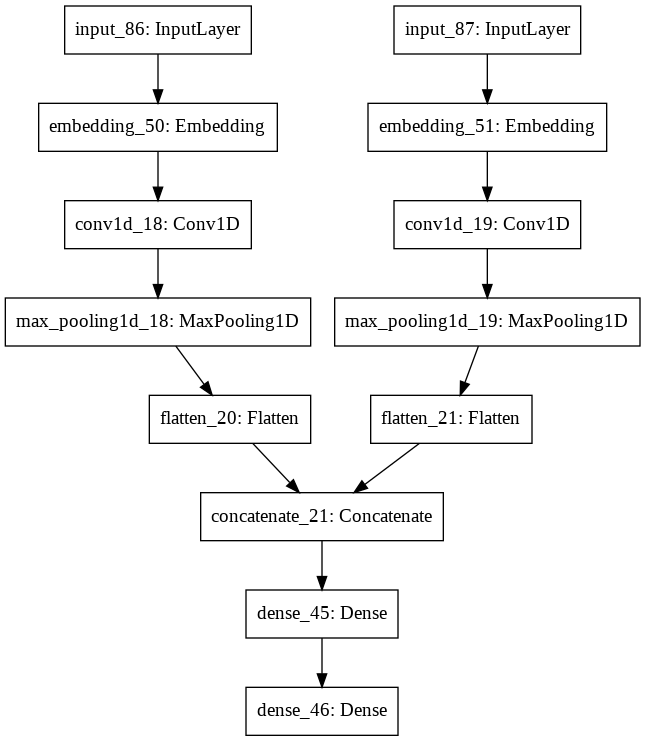

In [ ]:
model_cnn_file = 'model_cnn_quora-20.h5'
from keras.utils import plot_model 
import pickle
input1 = Input(shape=(max_len,))
input2 = Input(shape=(max_len,))
EMBEDDING_DIM=300
x1 = Embedding(vocab_size_q1 , 
                 EMBEDDING_DIM, 
                 weights=[createEmbeddingMatrix(wordIndex_q1)], 
                 input_length=max_len, 
                 trainable=False)(input1)
#x1 = TimeDistributed(Dense(EMBEDDING_DIM, activation='relu'))(x1)
#x1 = Lambda(lambda x: K.max(x, axis=1), output_shape=(EMBEDDING_DIM,1 ))(x1)
x1=Conv1D(filters=128, kernel_size=3, activation='relu')(x1)
x1 = MaxPooling1D(pool_size=2)(x1)
x1 = Flatten()(x1)


x2 = Embedding(vocab_size_q2, 
                 EMBEDDING_DIM, 
                 weights=[createEmbeddingMatrix(wordIndex_q2)], 
                 input_length=max_len, 
                 trainable=False)(input2)
#x2 = TimeDistributed(Dense(EMBEDDING_DIM, activation='relu'))(x2)
#x2 = Lambda(lambda x: K.max(x, axis=1), output_shape=(EMBEDDING_DIM,1 ))(x2) 
x2=Conv1D(filters=128, kernel_size=3, activation='relu')(x2)
x2 = MaxPooling1D(pool_size=2)(x2)
x2 = Flatten()(x2)
inputs=concatenate([x1,x2])

print(inputs.shape)
#inputs=Conv1D(filters=128, kernel_size=3, activation='relu')(inputs)  # ERROR

#print('a')
#inputs=MaxPooling1D(pool_size=3)(inputs)
#inputs = Dropout(0.2)(inputs)
#inputs = BatchNormalization()(inputs)
inputs = Dense(128, activation='relu')(inputs)

final = Dense(1, activation='sigmoid')(inputs)

model = Model(inputs=[input1,input2], outputs=final)
print('a')
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.0001)
, metrics=['acc',f1_m,precision_m, recall_m])


# Train the model, checkpointing weights with best validation accuracy
print("Starting training at", datetime.datetime.now())
t0 = time.time()
callbacks = [ModelCheckpoint(model_cnn_file, monitor='val_acc', save_best_only=True)] 
history = model.fit([X_train_q1, X_train_q2],
                    y_train,
                    epochs=40,
                    validation_split=0.1,
                    verbose=2,
                    batch_size=32,
                    callbacks=callbacks)
t1 = time.time()
print("Training ended at", datetime.datetime.now())
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

# Print best validation accuracy and epoch
max_val_acc, idx = max((val, idx) for (idx, val) in enumerate(history.history['val_acc']))
print('Maximum validation accuracy = {0:.4f} (epoch {1:d})'.format(max_val_acc, idx+1))

# Evaluate the model with best validation accuracy on the test partition
#model.load_weights(model_cnn_file)
loss, accuracy, f1_score, precision, recall = model.evaluate([ np.array(X_test_q1), np.array(X_test_q2)], y_test, verbose=0)
print('Test loss = {0:.4f}, test accuracy = {1:.4f}'.format(loss, accuracy))


probs = model.predict([ np.array(X_test_q1), np.array(X_test_q2)], verbose=1)
predicted_classes=[0 if i < 0.5 else 1 for i in probs]
  #predicted_classes = bilstm_attention_model.predict_classes(X_test_initial, verbose=1)
  #print(predicted_classes)

print(classification_report(y_test, predicted_classes))
  #filename = 'finalized_model_cnn.sav'
  #pickle.dump(model, open(filename, 'wb'))


pickle.dump(model, open(model_lstm_file, 'wb'))

plot_model(model, to_file='model_cnn_quora.png')











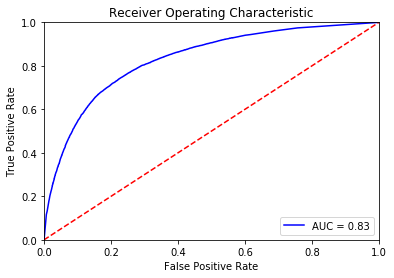

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# BiLSTM

In [ ]:
from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, GRU
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Concatenate, Input, concatenate, dot, Flatten, Reshape, Bidirectional, add
from keras.layers import TimeDistributed, Lambda
from keras.layers import Convolution1D, GlobalMaxPooling1D
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.layers.advanced_activations import PReLU
from keras.preprocessing import sequence, text

In [ ]:
input1 = Input(shape=(max_len,), dtype='int32')
input2 = Input(shape=(max_len,), dtype='int32')
EMBEDDING_DIM=300
x1 = Embedding(vocab_size_q1 , 
                 EMBEDDING_DIM, 
                 weights=[createEmbeddingMatrix(wordIndex_q1)], 
                 input_length=max_len, 
                 trainable=False)(input1)

x2 = Embedding(vocab_size_q2, 
                 EMBEDDING_DIM, 
                 weights=[createEmbeddingMatrix(wordIndex_q2)], 
                 input_length=max_len, 
                 trainable=False)(input2)
x1 = Bidirectional(LSTM(128, dropout=0.15, recurrent_dropout=0.15))(x1)
x2 = Bidirectional(LSTM(128, dropout=0.15, recurrent_dropout=0.15))(x2)

z1 = Input(shape=(1,), dtype='float32')

a1 = Input(shape=(1,), dtype='float32')
b1 = Input(shape=(1,), dtype='float32')

#x1 = Flatten()(x1)
#x2 = Flatten()(x2)
x = concatenate([x1, x2, z1, a1, b1])

x = Dropout(0.1)(x1)
x = BatchNormalization()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.1)(x)
x = BatchNormalization()(x)
#inputs = Flatten()(inputs)
#inputs = Dense(32, activation='relu')(inputs)
final = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[input1,input2], outputs=final)
print('a')
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.0001)
, metrics=['acc',f1_m,precision_m, recall_m])


# Train the model, checkpointing weights with best validation accuracy
print("Starting training at", datetime.datetime.now())
t0 = time.time()
model_lstm_file='model_lstm_quora.h5'
callbacks = [ModelCheckpoint(model_lstm_file, monitor='val_acc', save_best_only=True)] 
history = model.fit([X_train_q1, X_train_q2],
                    y_train,
                    epochs=60,
                    validation_split=0.1,
                    verbose=1,
                    batch_size=2048,
                    callbacks=callbacks)
t1 = time.time()
print("Training ended at", datetime.datetime.now())
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))




a
Starting training at 2019-12-25 22:33:22.493474
Train on 318375 samples, validate on 35376 samples
Epoch 1/60
318375/318375 [==============================] - 73s 230us/step - loss: 0.7270 - acc: 0.5825 - f1_m: 0.5030 - precision_m: 0.4494 - recall_m: 0.5723 - val_loss: 0.6411 - val_acc: 0.6341 - val_f1_m: 0.5763 - val_precision_m: 0.5067 - val_recall_m: 0.6683
Epoch 2/60
318375/318375 [==============================] - 65s 203us/step - loss: 0.6452 - acc: 0.6405 - f1_m: 0.5298 - precision_m: 0.5121 - recall_m: 0.5498 - val_loss: 0.6042 - val_acc: 0.6712 - val_f1_m: 0.5853 - val_precision_m: 0.5521 - val_recall_m: 0.6229
Epoch 3/60
318375/318375 [==============================] - 65s 203us/step - loss: 0.6168 - acc: 0.6644 - f1_m: 0.5307 - precision_m: 0.5478 - recall_m: 0.5152 - val_loss: 0.5817 - val_acc: 0.6940 - val_f1_m: 0.5809 - val_precision_m: 0.5929 - val_recall_m: 0.5696
Epoch 4/60
318375/318375 [==============================] - 65s 203us/step - loss: 0.6013 - acc: 0.6811 

In [ ]:
# Print best validation accuracy and epoch
from keras.utils import plot_model 
max_val_acc, idx = max((val, idx) for (idx, val) in enumerate(history.history['val_acc']))
print('Maximum validation accuracy = {0:.4f} (epoch {1:d})'.format(max_val_acc, idx+1))
# Evaluate the model with best validation accuracy on the test partition
loss, accuracy, f1_score, precision, recall = model.evaluate([ np.array(X_test_q1), np.array(X_test_q2)], y_test, verbose=0)
print('Test loss = {0:.4f}, test accuracy = {1:.4f}'.format(loss, accuracy))

plot_model(model, to_file='model_lstm_quora.png')
probs = model.predict([ np.array(X_test_q1), np.array(X_test_q2)], verbose=1)
predicted_classes=[0 if i < 0.5 else 1 for i in probs]
  #predicted_classes = bilstm_attention_model.predict_classes(X_test_initial, verbose=1)
  #print(predicted_classes)

print(classification_report(y_test, predicted_classes))
  #filename = 'finalized_model_cnn.sav'


Maximum validation accuracy = 0.7489 (epoch 59)
Test loss = 0.5177, test accuracy = 0.7470
50536/50536 [==============================] - 248s 5ms/step
              precision    recall  f1-score   support

           0       0.77      0.85      0.81     31784
           1       0.69      0.57      0.62     18752

    accuracy                           0.75     50536
   macro avg       0.73      0.71      0.72     50536
weighted avg       0.74      0.75      0.74     50536



In [ ]:
import pickle 
# Print best validation accuracy and epoch
max_val_acc, idx = max((val, idx) for (idx, val) in enumerate(history.history['val_acc']))
print('Maximum validation accuracy = {0:.4f} (epoch {1:d})'.format(max_val_acc, idx+1))

# Evaluate the model with best validation accuracy on the test partition
model.load_weights(model_lstm_file)
loss, accuracy, f1_score, precision, recall = model.evaluate([ np.array(X_test_q1), np.array(X_test_q2)], y_test, verbose=0)
print('Test loss = {0:.4f}, test accuracy = {1:.4f}'.format(loss, accuracy))


probs = model.predict([ np.array(X_test_q1), np.array(X_test_q2)], verbose=1)
predicted_classes=[0 if i < 0.5 else 1 for i in probs]
  #predicted_classes = bilstm_attention_model.predict_classes(X_test_initial, verbose=1)
  #print(predicted_classes)

print(classification_report(y_test, predicted_classes))
  #filename = 'finalized_model_cnn.sav'
pickle.dump(model, open(model_lstm_file, 'wb'))